# HW 5 #
### Total points: 80 ###

## Name(s) and EID(s):
Sarthak Shivnani (ss223347) </br>
Shashank Rao (sr55952)

If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment but make sure to include both students' names and UT EIDs.**  

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook and PDF before submitting.

# Q1. Convolutional Neural Networks (20 points)
Answer the following questions briefly (1 paragraph should suffice):

## Part 1 (6 points)
Why are skip connections useful in CNN architectures like ResNet? (*Hint: think about gradient propagation in very deep networks*)

## Answer
Skip connections, as utilized in architectures like ResNet, are integral to addressing the challenges associated with training deep neural networks, particularly the vanishing gradient problem. By allowing the gradients to bypass intermediate layers through residual connections, they facilitate improved gradient propagation during backpropagation. This mechanism ensures that information from earlier layers is preserved, enabling the network to learn residual mappings instead of directly modeling the underlying function. This approach simplifies optimization, mitigates the degradation problem (where deeper networks perform worse), and enhances the overall representational capacity of the network, making it more effective in learning complex hierarchical features.

## Part 2 (7 points)
How does batch normalization improve training in CNNs, and why is it generally used after a convolutional layer but before the activation function?

## Answer
Batch normalization significantly enhances training efficiency in CNNs by normalizing the input features to each layer based on the mean and variance computed across mini-batches. This normalization reduces the internal covariate shift, where the distribution of inputs to a layer changes during training, thus stabilizing the optimization process. It also enables the use of higher learning rates and acts as a regularizer, reducing overfitting. Batch normalization is typically applied after the convolutional layer but before the activation function to ensure that the normalized features are effectively scaled and shifted prior to applying non-linear transformations. This placement optimizes the learning dynamics and enhances the network's generalization ability.

## Part 3 (7 points)
Explain how the concept of translation invariance is achieved in CNNs and why it is an important property for visual recognition tasks.

## Answer
Translation invariance in CNNs is achieved through convolutional and pooling operations. Convolutional layers use shared weights and biases to detect patterns across different spatial locations, ensuring that the learned features are position-independent. Pooling layers, such as max pooling or average pooling, further contribute to translation invariance by summarizing feature activations within localized regions, reducing the sensitivity of the model to small positional variations in the input. This property is fundamental for visual recognition tasks as it allows the model to consistently recognize objects and patterns regardless of their spatial orientation or position within the image. Consequently, translation invariance enhances the robustness, generalization, and applicability of CNNs in real-world scenarios.

# Q2. Contrastive Learning (30 points)

### Part 1 (5 points)
Consider the example we saw in the class w.r.t Contrastive Learning (CL). We had two Cat images (say $C_1$, $C_2$) and one Bicycle image($B_1$), which we used for CL. However, if we only had one Cat image($C_1$) and one Bicycle image($B_1$), can we still do Contrastive Learning? If no, why?

If yes, how? (ie, what will be my reference sample, positive sample, and negative sample?)
### Answer
Yes, it is feasible to perform contrastive learning with one Cat image (
𝐶1
​
 ) and one Bicycle image (
𝐵1) by utilizing data augmentation techniques to create a positive sample for
𝐶1
 . In this setup, the original Cat image (
𝐶1
​
 ) serves as the reference sample, while a positive sample is generated by applying transformations such as random cropping, rotation, flipping, or adding Gaussian noise. These augmentations ensure that the semantic content of the image remains intact while providing a varied version of it. The Bicycle image (
𝐵1
​
 ) acts as the negative sample, representing a semantically dissimilar image.

The contrastive learning objective in this scenario is to maximize the similarity between the embeddings of the reference image (
𝐶1
​
 ) and its positive counterpart (augmented
𝐶1
​
 ), while simultaneously minimizing the similarity between the embeddings of the reference image and the negative sample (
𝐵1
​
 ). While this approach allows for the application of contrastive learning with minimal labeled data, its effectiveness may be limited due to the lack of diversity in the positive samples. Nonetheless, it highlights the adaptability of contrastive learning in scenarios where labeled data or a variety of samples is constrained.
### Part 2 (5 points)
We need labelled data for contrastive learning. True or False? Can you think of a real world example where contrastive learning is a better choice compared to the conventional training approach? (Caution: If you use ChatGPT to answer this question you might end up giving same example as other students)

### Answer
False. Contrastive learning does not inherently require labeled data, as it often operates in a self-supervised paradigm. Positive pairs are typically generated through data augmentation, ensuring that semantically similar representations are learned, while negative pairs are sampled from other instances in the dataset. This methodology enables contrastive learning to be particularly effective in domains where labeled data is scarce or expensive to obtain.

A real-world example Contrastive learning would be for improving autonomous vehicle systems, as it enables robust generalization to diverse real-world scenarios like varying weather, lighting, and road conditions. By using positive pairs (e.g., different views of the same stop sign) and negative pairs (e.g., a stop sign vs. a yield sign), the model learns to embed similar scenes closer together and dissimilar ones further apart in latent space. This reduces reliance on extensive labeled datasets, enhances recognition of rare or partially visible scenarios, and scales efficiently to new environments. This method ensures safer and more reliable performance for autonomous driving systems while streamlining data processing and model adaptation.

### Part 3 (20 points)

Let us now mimic contrastive learning on a toy example to get a feeling of how it helps learn better representations for the data samples (After all, the entire Deep Learning is, in someway, learning to represent the data accurately)

We will pick the same example again. Consider three 32x32 images $C_1, C_2, B_1$. We use random values to fill the three images.

**What's more important is to ensure that C1 is more similar to C2 than B1, for the algorithm to work!**

Part 3.0 (3 points) Please initialize C1 and B1. C2 has been filled for you, which you can see, is just a slightly noisy version of C1.

In [1]:
# Install required libraries (if not already installed)
!pip install torch torchvision
!pip install matplotlib
!pip install scikit-learn

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import random
import torchvision.transforms.functional as TF

# Set random seed for reproducibility
random_seed = 16

random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

# Define sample images for cats (C1, C2) and bicycle (B1)
C1 = torch.randn(3, 32, 32)  # Cat image 1, initialized with random values
C2 = C1 + 0.5 * torch.randn(3, 32, 32)  # Cat image 2, same as C1 with slight noise
B1 = torch.randn(3, 32, 32)  # Bicycle image, initialized with random values


We have provided you with an Encoder (SimpleEncoder) that generates vector representation for an input image. Note how the encoder uses Convolution to generate vector representation of an image.

Part 3.1 (2 points) Please complete the forward pass of the Encoder module

In [3]:
class SimpleEncoder(nn.Module):
    def __init__(self):
        super(SimpleEncoder, self).__init__()
        self.conv = nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1)
        self.fc = nn.Linear(16 * 16 * 16, 128)

    def forward(self, x):
        # Pass x through conv layer
        x = self.conv(x)  # Apply the convolutional layer
        x = x.view(x.size(0), -1)
        # Pass x through the Fully Connected Layer
        x = self.fc(x)  # Apply the fully connected layer
        return F.normalize(x, p=2, dim=1)

# Function for contrastive loss as in previous example
def contrastive_loss(anchor, positive, negatives, temperature=0.5):
    pos_sim = F.cosine_similarity(anchor.unsqueeze(0), positive.unsqueeze(0))
    pos_loss = -torch.log(torch.exp(pos_sim / temperature))
    neg_loss = sum(-torch.log(1 - torch.exp(F.cosine_similarity(anchor.unsqueeze(0), neg.unsqueeze(0)) / temperature))
                   for neg in negatives)
    return pos_loss + neg_loss


Part 3.2 (5 points)
Get embeddings for the images. Build the positive and negative pairs. Code for doing contrastive learning on these pairs is already given to you.

In [4]:
# Instantiate encoder and generate initial embeddings
encoder = SimpleEncoder()
images = torch.stack([C1, C2, B1])  # Stack images into a batch

# Get initial_embeddings for the images using encoder
initial_embeddings = encoder(images).detach()  # Detach to avoid tracking gradients

# Train encoder to minimize contrastive loss (one simple update step as an example)
optimizer = torch.optim.Adam(encoder.parameters(), lr=0.01)

# Run few passes of training (we don't want it to overfit given a single sample)
for _ in range(1):
    embeddings = encoder(images)
    # Build positive and negative pairs
    pos_pair = (embeddings[0], embeddings[1])  # Positive pair (C1, C2)
    neg_pair1 = (embeddings[0], embeddings[2])  # Negative pair (C1, B1)
    neg_pair2 = (embeddings[1], embeddings[2])  # Negative pair (C2, B1)

    # Contrastive loss as before
    loss1 = contrastive_loss(pos_pair[0], pos_pair[1], [neg_pair1[1]])
    loss2 = contrastive_loss(pos_pair[1], pos_pair[0], [neg_pair2[1]])
    total_loss = (loss1 + loss2) / 2

    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

encoder.eval()
with torch.no_grad():
    trained_embeddings = encoder(images).detach()

###Cosine Similarity between embeddings
The cosine similarity between embeddings would change once you run the CL algorithm. Run the below cell to observe the cosine similarities and answer the question that follows.

In [5]:
from torch.nn.functional import cosine_similarity

# Function to compute and print cosine similarities
def print_cosine_similarities(embeddings, stage=""):
    # Calculate cosine similarities
    sim_C1_C2 = cosine_similarity(embeddings[0].unsqueeze(0), embeddings[1].unsqueeze(0)).item()
    sim_C1_B1 = cosine_similarity(embeddings[0].unsqueeze(0), embeddings[2].unsqueeze(0)).item()
    sim_C2_B1 = cosine_similarity(embeddings[1].unsqueeze(0), embeddings[2].unsqueeze(0)).item()

    # Print similarities
    print(f"Cosine Similarities {stage}:")
    print(f"Similarity between C1 and C2 (positive pair): {sim_C1_C2:.4f}")
    print(f"Similarity between C1 and B1 (negative pair): {sim_C1_B1:.4f}")
    print(f"Similarity between C2 and B1 (negative pair): {sim_C2_B1:.4f}\n")

# Cosine similarities before training
print_cosine_similarities(initial_embeddings, stage="Before Contrastive Learning")

# Cosine similarities after training
print_cosine_similarities(trained_embeddings, stage="After Contrastive Learning")


Cosine Similarities Before Contrastive Learning:
Similarity between C1 and C2 (positive pair): 0.9193
Similarity between C1 and B1 (negative pair): 0.1696
Similarity between C2 and B1 (negative pair): 0.1561

Cosine Similarities After Contrastive Learning:
Similarity between C1 and C2 (positive pair): 0.9980
Similarity between C1 and B1 (negative pair): 0.0626
Similarity between C2 and B1 (negative pair): 0.0586



Part 3.3(5 points) Comment on the cosine similarities before and after the contrastive learning.

Contrastive learning has significantly improved the quality of embeddings by enhancing the separation between positive and negative pairs. Before contrastive learning, the positive pair (\(C1\) and \(C2\)) exhibited a high cosine similarity of \(0.9193\), indicating some closeness in the original representation. However, the negative pairs (\(C1\) and \(B1\); \(C2\) and \(B1\)) had similarities of \(0.1696\) and \(0.1561\), suggesting insufficient separation between dissimilar items in the latent space. This implies that the pre-contrastive learning embeddings were not fully optimized for distinguishing between similar and dissimilar items.

After contrastive learning, the model has clearly learned to create a more meaningful representation space. The cosine similarity for the positive pair increased to \(0.9980\), showing near-perfect clustering of similar items. Conversely, the similarities for negative pairs dropped significantly to \(0.0626\) and \(0.0586\), demonstrating a stronger divergence between dissimilar items. These results highlight the effectiveness of contrastive learning in refining embeddings, making it more suitable for applications like similarity search, clustering, or classification.

### Plotting the embeddings
To visualize the relative change in position before and after CL, we have provided code that uses PCA to plot the embeddings on a 2-D space. Run and generate the plot and then answer the question that follows.

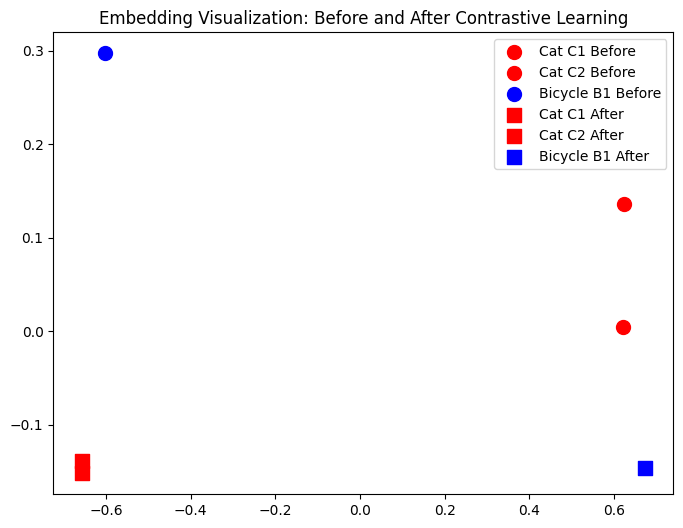

In [6]:
from sklearn.decomposition import PCA
# Function to plot embeddings using PCA
def plot_embeddings(initial_embeddings, trained_embeddings, labels):
    # Combine embeddings before and after CL
    embeddings_combined = torch.cat([initial_embeddings, trained_embeddings], dim=0).cpu().numpy()

    # Apply PCA
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings_combined)

    # Define markers and colors for before and after
    markers = ['o', 's']  # Circle for 'Before', Square for 'After'
    colors = ['red', 'red', 'blue']

    plt.figure(figsize=(8, 6))
    # Plot before contrastive learning (initial embeddings)
    for i in range(3):
        plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], label=f'{labels[i]} Before', color=colors[i], marker=markers[0], s=100)

    # Plot after contrastive learning (trained embeddings)
    for i in range(3, 6):
        plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], label=f'{labels[i-3]} After', color=colors[i-3], marker=markers[1], s=100)

    plt.title("Embedding Visualization: Before and After Contrastive Learning")
    plt.legend()
    plt.show()

# Labels for the images
labels = ["Cat C1", "Cat C2", "Bicycle B1"]

# Plot combined before and after embeddings
plot_embeddings(initial_embeddings, trained_embeddings, labels)

Part 3.4 (5 points) Comment on the above chart. Do you see the points moving around? Do they make sense to you?

The chart illustrates how embeddings for "Cat" and "Bicycle" items evolve before and after contrastive learning. Initially, the embeddings of the positive pair ("Cat C1" and "Cat C2") are relatively close, reflecting some recognition of similarity by the model. However, the negative pair ("Bicycle B1" and the "Cat" embeddings) is not significantly far apart, indicating that the model struggles to effectively separate dissimilar classes in the latent space.

After applying contrastive learning, the embeddings of the positive pair ("Cat C1" and "Cat C2") move significantly closer together, demonstrating improved clustering of similar items. Meanwhile, the embedding for the negative pair ("Bicycle B1") moves further away from the "Cat" embeddings, showcasing the model's enhanced ability to distinguish between dissimilar items. This separation highlights the effectiveness of contrastive learning in refining the embedding space.

This movement aligns perfectly with the objectives of contrastive learning, which aims to group similar items together while pushing dissimilar ones apart. By restructuring the latent space in this way, contrastive learning improves the meaningfulness of the learned embeddings, enabling better performance in downstream tasks such as classification, clustering, or similarity-based retrieval.






